<a href="https://colab.research.google.com/github/rohitLanjewar03/digit_classification/blob/main/digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import urllib.request

url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
urllib.request.urlretrieve(url, "mnist.npz")

data = np.load("mnist.npz")

X_train = data["x_train"]
y_train = data["y_train"]
X_test = data["x_test"]
y_test = data["y_test"]


In [ ]:
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

def one_hot(y, num_classes=10):
    encoded = np.zeros((y.size, num_classes))
    encoded[np.arange(y.size), y] = 1
    return encoded

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)


In [ ]:
np.random.seed(42)

input_size = 784
hidden_size = 128
output_size = 10

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


In [ ]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def softmax(Z):
    exp = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)


In [ ]:
def forward(X):
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = softmax(Z2)
    return Z1, A1, A2


In [ ]:
def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))


In [ ]:
def backward(X, y, Z1, A1, A2, lr=0.1):
    global W1, b1, W2, b2

    dZ2 = A2 - y
    dW2 = A1.T @ dZ2 / X.shape[0]
    db2 = np.mean(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X.T @ dZ1 / X.shape[0]
    db1 = np.mean(dZ1, axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2


In [ ]:
epochs = 20
batch_size = 128
losses = []

for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train_oh[i:i+batch_size]

        Z1, A1, A2 = forward(X_batch)
        backward(X_batch, y_batch, Z1, A1, A2)

    _, _, train_pred = forward(X_train)
    loss = cross_entropy(y_train_oh, train_pred)
    acc = accuracy(y_train_oh, train_pred)

    losses.append(loss)
    print(f"Epoch {epoch+1}/{epochs} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")


Epoch 1/20 | Loss: 0.3592 | Accuracy: 0.8929
Epoch 2/20 | Loss: 0.2829 | Accuracy: 0.9169
Epoch 3/20 | Loss: 0.2376 | Accuracy: 0.9311
Epoch 4/20 | Loss: 0.2038 | Accuracy: 0.9418
Epoch 5/20 | Loss: 0.1778 | Accuracy: 0.9496
Epoch 6/20 | Loss: 0.1573 | Accuracy: 0.9556
Epoch 7/20 | Loss: 0.1412 | Accuracy: 0.9601
Epoch 8/20 | Loss: 0.1281 | Accuracy: 0.9641
Epoch 9/20 | Loss: 0.1170 | Accuracy: 0.9671
Epoch 10/20 | Loss: 0.1075 | Accuracy: 0.9701
Epoch 11/20 | Loss: 0.0993 | Accuracy: 0.9726
Epoch 12/20 | Loss: 0.0922 | Accuracy: 0.9747
Epoch 13/20 | Loss: 0.0860 | Accuracy: 0.9766
Epoch 14/20 | Loss: 0.0805 | Accuracy: 0.9781
Epoch 15/20 | Loss: 0.0757 | Accuracy: 0.9793
Epoch 16/20 | Loss: 0.0714 | Accuracy: 0.9803
Epoch 17/20 | Loss: 0.0673 | Accuracy: 0.9811
Epoch 18/20 | Loss: 0.0639 | Accuracy: 0.9826
Epoch 19/20 | Loss: 0.0605 | Accuracy: 0.9837
Epoch 20/20 | Loss: 0.0575 | Accuracy: 0.9846


In [ ]:
_, _, test_pred = forward(X_test)
print("Test Accuracy:", accuracy(y_test_oh, test_pred))


Test Accuracy: 0.9753


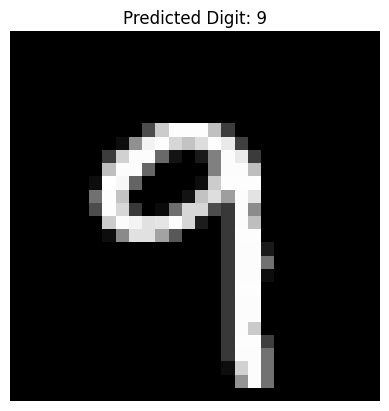

In [12]:
index = np.random.randint(0, X_test.shape[0])
image = X_test[index].reshape(28, 28)
prediction = np.argmax(test_pred[index])

plt.imshow(image, cmap="gray")
plt.title(f"Predicted Digit: {prediction}")
plt.axis("off")
plt.show()
